In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
# data collection
mnist = tf.keras.datasets.fashion_mnist

In [3]:
# loading of data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

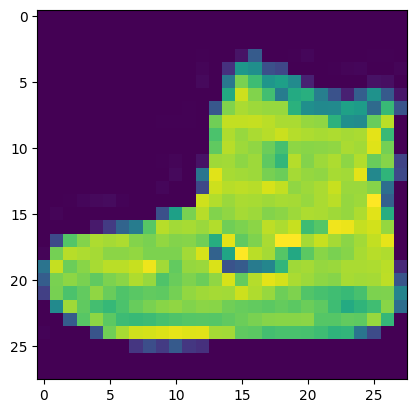

In [4]:
# data visulaization
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

0
[[0.         0.         0.         0.         0.         0.00392157
  0.         0.         0.         0.         0.16078431 0.7372549
  0.40392157 0.21176471 0.18823529 0.16862745 0.34117647 0.65882353
  0.52156863 0.0627451  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.         0.19215686 0.53333333 0.85882353 0.84705882 0.89411765
  0.9254902  1.         1.         1.         1.         0.85098039
  0.84313725 0.99607843 0.90588235 0.62745098 0.17647059 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.05490196
  0.69019608 0.87058824 0.87843137 0.83137255 0.79607843 0.77647059
  0.76862745 0.78431373 0.84313725 0.8        0.79215686 0.78823529
  0.78823529 0.78823529 0.81960784 0.85490196 0.87843137 0.64313725
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.7372549

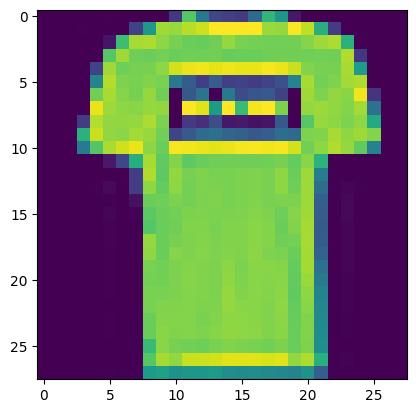

In [21]:
# data visulaization-2
import matplotlib.pyplot as plt
plt.imshow(training_images[1])
print(training_labels[1])
print(training_images[1])

In [5]:
# data normalisation
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [6]:
# design the model with 3 layers model
# Sequential defines a sequence of layers in the neural network.
# Flatten takes a square and turns it into a one-dimensional vector.
# Dense adds a layer of neurons.
# Activation functions tell each layer of neurons what to do:
# Relu effectively means that if X is greater than 0 return X, else return 0. It only passes values of 0 or greater to the next layer in the network.
# Softmax takes a set of values, and effectively picks the biggest one.
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), tf.keras.layers.Dense(128, activation=tf.nn.relu), tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [7]:
# Model building and training
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4989 - accuracy: 0.8249
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3728 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3352 - accuracy: 0.8783
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3091 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2919 - accuracy: 0.8911


In [8]:
# Test the model
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3523 - accuracy: 0.8755


[0.3523348569869995, 0.8755000233650208]

In [9]:
classifications = model.predict(test_images)
print(classifications[0])

313/313 [==============================] - 1s 2ms/step
[3.8789972e-06 2.3702633e-08 1.3109383e-07 3.4619757e-10 8.2389079e-08
 1.9439885e-03 7.2308494e-06 1.7319907e-02 3.9995222e-05 9.8068482e-01]


In [10]:
print(test_labels[0])

9


In [12]:
classifications = model.predict(test_images)

print(classifications[1])

313/313 [==============================] - 1s 3ms/step
[9.1460715e-05 9.1194536e-09 9.9451387e-01 4.0946375e-09 4.9880268e-03
 1.9634667e-06 4.0468070e-04 1.1837766e-12 2.0608709e-08 1.5658051e-11]


In [13]:
print(test_labels[1])

2


In [14]:
# Hidden Layers increased
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4716
Epoch 2/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3603
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3215
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2957
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[2.78907319e-09 1.65446745e-09 8.78008846e-11 6.76895389e-12
 3.28106409e-09 1.16543255e-04 2.97101499e-09 7.88777322e-03
 2.04979909e-08 9.91995633e-01]
9


In [16]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# This version has the 'flatten' removed. Replace the above with this one to see the error.
#model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[1])
print(test_labels[1])

2.15.0
Epoch 1/5


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(32,) and logits.shape=(896, 10)


In [ ]:
## Error detection details:
## The Flatten layer is needed in this case because the input data for the neural network is a two-dimensional array (a 28x28 image), but the Dense layers expect one-dimensional input data.
## Without the Flatten layer, the input data would be passed to the Dense layers as a two-dimensional array, which would result in an error.

### Here's a more detailed explanation:

##The Dense layer expects input data in the following format: [batch_size, features]. In this case, the batch size is the number of images being processed at once, and the features are the individual pixels in each image.
##The input data for this neural network is a two-dimensional array with the shape (28, 28). This means that each image is represented as a 28x28 grid of pixels.
##To convert the two-dimensional input data into one-dimensional data, we need to flatten it. This means that we need to take all of the pixels in each image and arrange them in a single row.
##The Flatten layer does this for us. It takes the two-dimensional input data and reshapes it into a one-dimensional array with the shape [batch_size, 784]. This is because there are 28x28 = 784 pixels in each image.
##The one-dimensional output from the Flatten layer can then be passed to the Dense layers.
##In general, the Flatten layer is used whenever you have input data that is not already in the correct format for the Dense layers. For example, if you have input data that is a three-dimensional array (e.g., a color image), you would need to use a Flatten layer to convert it into a one-dimensional array before passing it to the Dense layers.

In [17]:
# Another checking
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-17-33c9e637b54b>", line 25, in <cell line: 25>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 5 7 1 6 2 3 6 7 6 7 9 9 5 3 8 4 5 5 8 7 3 5 1 9 9 2 0 0 1 2 3 8
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_110978]

In [19]:
# The error message points to an issue with the sparse_categorical_crossentropy loss function.
# The error message states that a label value of 9 is outside the valid range of [0, 5).
# This means that the model is expecting labels between 0 and 4, but it encountered a label of 9.
print(training_labels)
print(test_labels)

[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


In [ ]:
# From above we can cnclude that there is need to change the output layer of the model to have 10 neurons instead of 5.

In [20]:
# Consider the effects of additional layers in the network.
# What will happen if you add another layer between the one with 512 and the final layer with 10?
# There isn't a significant impact -- because this is relatively simple data.
# For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 25s 12ms/step - loss: 0.4652
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3563
Epoch 3/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3199
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2951
Epoch 5/5
313/313 [==============================] - 1s 3ms/step
[2.0697474e-08 9.0923482e-09 2.0312902e-09 5.5544780e-10 4.0997103e-10
 2.8566211e-03 2.4098862e-08 3.9385990e-03 1.4077395e-09 9.9320471e-01]
9


In [22]:
# Consider the impact of training for more or less epochs. Why do you think that would be the case?

# I have tried 15 epochs -- Got a model with a much better loss than the one with 5 Try 30 epochs
# Saw the loss value stops decreasing, and sometimes increases.
# This is a side effect of something called 'overfitting' which you can learn about [somewhere]
# It is something you need to keep an eye out for when training neural networks.
# There's no point in wasting your time training if you aren't improving your loss, right! :)
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

2.15.0
Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5025
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3805
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3437
Epoch 4/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3172
Epoch 5/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3009
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2829
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2707
Epoch 8/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2597
Epoch 9/30
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2506
Epoch 10/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2407
Epoch 11/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2372
Epoch 12/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0

In [23]:
# Before I trained, normalized the data, going from values that were 0 through 255 to values that were 0 through 1.
# What would be the impact of removing that?
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 4.2990
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5265
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5068
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5003
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[1.9835710e-15 3.5707580e-15 8.0527958e-20 4.4003730e-16 1.5246095e-22
 6.7817359e-03 6.1527788e-20 2.4431892e-02 2.7594527e-11 9.6878636e-01]
9


In [ ]:
# In a nutshell, normalization reduces the complexity of the problem your network is trying to solve.
## This can potentially increase the accuracy of your model and speed up the training.
### You bring the data on the same scale and reduce variance.
### None of the weights in the network are wasted on doing a normalization for you, meaning that they can be used more efficiently to solve the actual task at hand.

In [24]:
# Earlier when I trained for extra epochs I had an issue where my loss might change.
# It might have taken a bit of time for one to wait for the training to do that,
# One might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for one.
# If one reaches that after 3 epochs, why sit around waiting for it to finish a lot more epochs....
# So how would one fix that? Like any other program...One has callbacks! Let's see them in action...
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

2.15.0
Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4708 - accuracy: 0.8314
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3556 - accuracy: 0.8710
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3240 - accuracy: 0.8791
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2966 - accuracy: 0.8907
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2796 - accuracy: 0.8962
